In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Load the data files
path1 = '/home/oscar/Documentos/DataScience/DataBase/Titanic/train.csv'
path2 = '/home/oscar/Documentos/DataScience/DataBase/Titanic/test.csv'
path3 = '/home/oscar/Documentos/DataScience/DataBase/Titanic/gender_submission.csv'
train  = pd.read_csv(path1)
test   = pd.read_csv(path2)
gender = pd.read_csv(path3)

# # EXPLORATORY DATA ANALYSIS

In [3]:
# We print the main information
print(train.info())
print('-'*50)
print('The shape is:          ', train.shape)
print('-'*50)
print('The dim is:            ', train.ndim)
print('-'*50)
print('Teh size is:           ', train.size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
--------------------------------------------------
The shape is:           (891, 12)
--------------------------------------------------
The dim is:             2
--------------------------------------------------
Teh size is:            10

In [4]:
# Print the first rows
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# We check the cleanliness and completeness of the data.
print('The values empty: \n', train.isnull().sum())

The values empty: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
# Descriptive statistics
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: Age, Length: 88, dtype: int64
--------------------------------------------------
The main features of "Age" column. 

Mean:             29.0
Median:           28.0
Mode:             0    24.0
dtype: float64
Maximum:          80.0
Minimum:          0.42
--------------------------------------------------


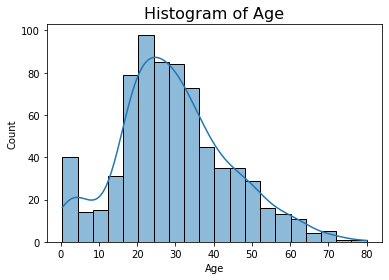

In [7]:
# We check the age values
print(train['Age'].value_counts())
print('-'*50)

print('The main features of "Age" column. \n')
print('Mean:            ', np.floor(train['Age'].mean()))
print('Median:          ', train['Age'].median())
print('Mode:            ', train['Age'].mode())
print('Maximum:         ', train['Age'].max())
print('Minimum:         ', train['Age'].min())
print('-'*50)

sns.histplot(train['Age'], kde=True)
plt.title('Histogram of Age', fontsize=16)
plt.show()

male      577
female    314
Name: Sex, dtype: int64



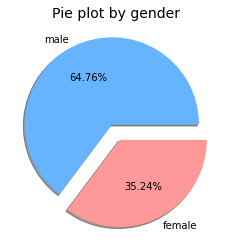

In [8]:
print(train['Sex'].value_counts())
print()

labels = train['Sex'].unique()
colors = ['#66b3ff','#ff9999']

plt.pie(train['Sex'].value_counts(), labels=labels, autopct='%1.2f%%',
        shadow=True, explode=(0.1, 0.1), colors=colors)
plt.title('Pie plot by gender', fontsize=14)
plt.show()


The main features of "Fare" column. 

Mean:             32.2042079685746
Median:           14.4542
Mode:             0    8.05
dtype: float64
Maximum:          512.3292
Minimum:          0.0
--------------------------------------------------
43
--------------------------------------------------


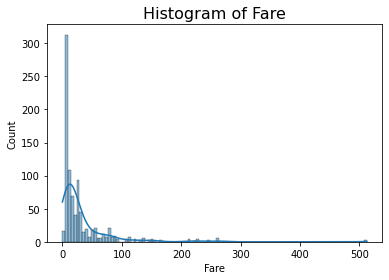

In [9]:
print('The main features of "Fare" column. \n')
print('Mean:            ', train['Fare'].mean())
print('Median:          ', train['Fare'].median())
print('Mode:            ', train['Fare'].mode())
print('Maximum:         ', train['Fare'].max())
print('Minimum:         ', train['Fare'].min())
print('-'*50)

print(train['Fare'].value_counts().max())
print('-'*50)

sns.histplot(train['Fare'], kde=True)
plt.title('Histogram of Fare', fontsize=16)
plt.show()

The main features of "Age" column for Male. 

Mean:             30.0
Median:           29.0
Mode:             0    19.0
1    25.0
2    28.0
dtype: float64
Maximum:          80.0
Minimum:          0.42
--------------------------------------------------
The main features of "Age" column for Female. 

Mean:             27.0
Median:           27.0
Mode:             0    24.0
dtype: float64
Maximum:          63.0
Minimum:          0.75
--------------------------------------------------


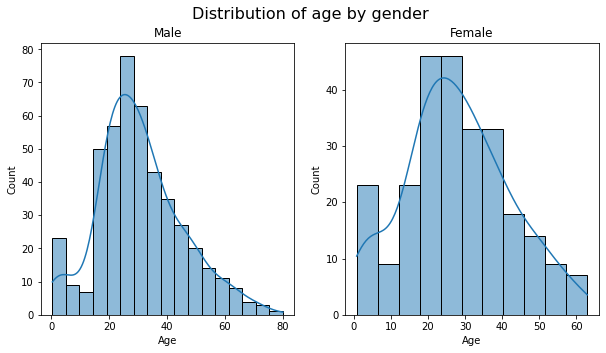

In [10]:
train_ma = train[train['Sex'] == 'male']
train_fe = train[train['Sex'] == 'female']

print('The main features of "Age" column for Male. \n')
print('Mean:            ', np.floor(train_ma['Age'].mean()))
print('Median:          ', train_ma['Age'].median())
print('Mode:            ', train_ma['Age'].mode())
print('Maximum:         ', train_ma['Age'].max())
print('Minimum:         ', train_ma['Age'].min())
print('-'*50)

print('The main features of "Age" column for Female. \n')
print('Mean:            ', np.floor(train_fe['Age'].mean()))
print('Median:          ', train_fe['Age'].median())
print('Mode:            ', train_fe['Age'].mode())
print('Maximum:         ', train_fe['Age'].max())
print('Minimum:         ', train_fe['Age'].min())
print('-'*50)

# Age by gender
plt.figure(figsize=(10,5))
plt.suptitle('Distribution of age by gender', fontsize=16)

plt.subplot(1,2,1)
sns.histplot(train_ma['Age'], kde=True)
plt.title('Male')

plt.subplot(1,2,2)
sns.histplot(train_fe['Age'], kde=True)
plt.title('Female')

plt.show()

A value of 1 means that the passenger survived.
A value of 0 means that the passenger did not survive.

0    549
1    342
Name: Survived, dtype: int64




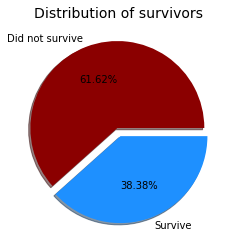

In [11]:
# Percentage of survivors
print('A value of 1 means that the passenger survived.')
print('A value of 0 means that the passenger did not survive.\n')
print(train['Survived'].value_counts())
print('\n')


colors = ['darkred', 'dodgerblue']
labels = ['Did not survive', 'Survive'] 
plt.pie(train['Survived'].value_counts(), colors=colors, labels=labels,
        autopct='%1.2f%%', shadow=True, explode=(0.05,0.05))
plt.title('Distribution of survivors', fontsize=14)
plt.show()

In [12]:
# Distribution of survivors by gender
len_ma = len(train_ma['Survived'])
len_fe = len(train_fe['Survived'])
a = train_ma['Survived'].value_counts()
b = train_fe['Survived'].value_counts()
dic_data_1 = {'Male':[a[0]/len_ma, a[1]/len_ma], 
              'Female':[b[0]/len_fe, b[1]/len_fe]}
index = ['Did not survive', 'Survive']
survivor_gender = pd.DataFrame(data=dic_data_1, index=index)
print('Percentage of survivors by gender. \n')
survivor_gender

Percentage of survivors by gender. 



,Male,Female
Did not survive,0.811092,0.257962
Survive,0.188908,0.742038
